In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta

In [2]:
data_sub = pd.read_csv('sub/FINAL_sub_mean.csv')
data_fish = pd.read_csv('fish/fish_indexes.csv')
data_cor = pd.read_csv('corail/Pmana_corail_indexes.csv')
data_rec = pd.read_csv('corail/recrutement.csv')
data_multi = pd.read_csv('../../Multiparams/multiparamètres.csv')
data_org = pd.read_csv('org/org_out_indexes.csv')

In [3]:
data_org.set_index('Date', inplace=True)
data_org.index = pd.to_datetime(data_org.index)
data_org['Total'] = data_org['Total']/data_org['Total'].max()

In [4]:
data_cor = data_cor.drop(columns=['Sandalolitha', 'Total'])

In [5]:
data_multi = data_multi.rename(columns={'YearSeason': 'Date'})
data_cor = data_cor.rename(columns={'Year': 'Date'})

In [6]:
data_sub.rename(columns={'DC_mean': 'DC', 'A_mean': 'A', 'CA_mean': 'CA', 'LC_mean': 'LC', 'O_mean': 'O'}, inplace=True)

In [7]:
data_cor.set_index('Date', inplace=True)
data_cor.index = pd.to_datetime(data_cor.index)

In [8]:
data_cor.rename(columns={'Species richness': 'SR_cor', 'Total' : 'Tot_cor', 'Shannon': 'Sh_cor', 'Pielou' : 'Pi_cor', 'Brillouin' : 'Br_cor', 'Simpson' : 'Si_cor'}, inplace=True) 

In [9]:
data_fish.rename(columns={'Total' : 'Tot_fish', 'Shannon': 'Sh_fish', 'Pielou' : 'Pi_fish', 'Brillouin' : 'Br_fish', 'Simpson' : 'Si_fish'}, inplace=True)

In [10]:
data_rec.rename(columns={'Total' : 'Tot_rec', 'Shannon': 'Sh_rec', 'Pielou' : 'Pi_rec', 'Brillouin' : 'Br_rec', 'Simpson' : 'Si_rec'}, inplace=True)

In [11]:
data_rec.rename(columns={'Acroporidae' : 'Acro_rec', 'Autres' : 'Autres_rec', 'Pocilloporidae' : 'Pocillo_rec', 'Poritidae' : 'Porit_rec'}, inplace=True)

In [12]:
data_org.rename(columns={'Total' : 'Tot_org', 'Shannon': 'Sh_org', 'Pielou' : 'Pi_org', 'Brillouin' : 'Br_org', 'Simpson' : 'Si_org', 'Species richness' : 'SR_cor'}, inplace=True)

In [13]:
# normalize data from multiparams
data_multi.set_index('Date', inplace=True)
data_multi.index = pd.to_datetime(data_multi.index)

data_multi = data_multi/data_multi.max(axis=0)

In [14]:
data_rec = data_rec.rename(columns={'Date début': 'Date'})
data_rec.set_index('Date', inplace=True)

In [15]:
data_sub.set_index('Date', inplace=True)
data_fish.set_index('Date', inplace=True)

In [16]:
data_rec.index = pd.to_datetime(data_rec.index)
data_sub.index = pd.to_datetime(data_sub.index)
data_fish.index = pd.to_datetime(data_fish.index)

In [17]:
# data_cor = data_cor[data_cor.columns[-6:]]

In [18]:
# plt.plot(data_rec.index, data_rec['Total'])
# data_rec = data_rec.rolling(2).mean()
# plt.plot(data_rec.index, data_rec['Total'])

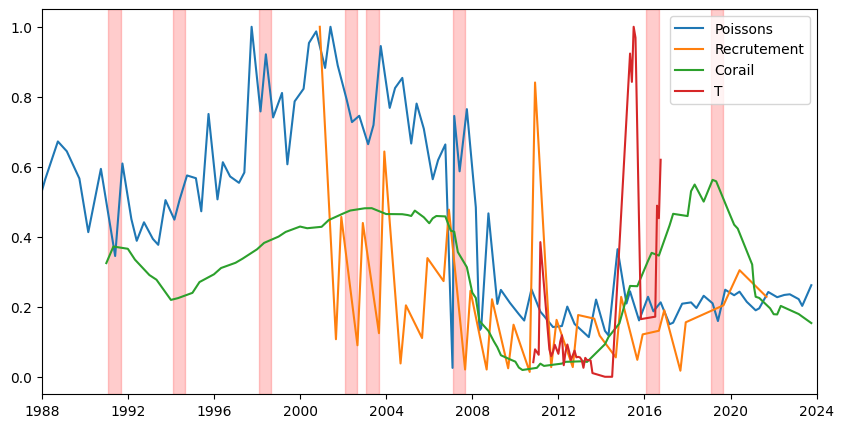

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(data_fish.index, data_fish['Tot_fish'], label='Poissons')
plt.plot(data_rec.index, data_rec['Tot_rec'], label='Recrutement')
plt.plot(data_sub.index, data_sub['LC'], label='Corail')
plt.xlim(pd.to_datetime('1988-01-01'), pd.to_datetime('2024-01-01'))
plt.plot(data_multi.index, data_multi['Fl'], label='T')
plt.legend()

# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

list_bleaching = pd.to_datetime(list_bleaching)

# color the background for bleaching events
for i in range(0, len(list_bleaching), 2):
    plt.axvspan(list_bleaching[i], list_bleaching[i+1], color='r', alpha=0.2)

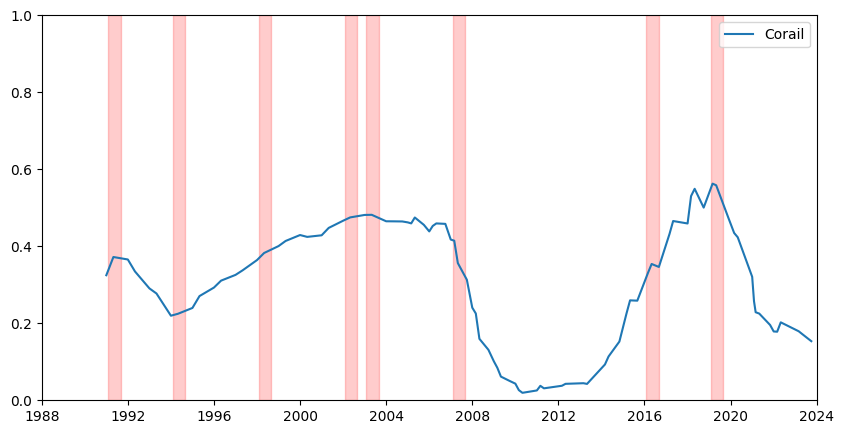

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(data_sub.index, data_sub['LC'], label='Corail')
plt.xlim(pd.to_datetime('1988-01-01'), pd.to_datetime('2024-01-01'))
plt.ylim(0, 1)
plt.legend()

# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

list_bleaching = pd.to_datetime(list_bleaching)

# color the background for bleaching events
for i in range(0, len(list_bleaching), 2):
    plt.axvspan(list_bleaching[i], list_bleaching[i+1], color='r', alpha=0.2)

In [21]:
data = pd.merge(data_sub, data_fish, how='outer', left_index=True, right_index=True)
data = pd.merge(data, data_rec, how='outer', left_index=True, right_index=True)
data = pd.merge(data, data_multi, how='outer', left_index=True, right_index=True)
data = pd.merge(data, data_cor, how='outer', left_index=True, right_index=True)
data = pd.merge(data, data_org, how='outer', left_index=True, right_index=True)

In [22]:
data.interpolate(method='time', inplace=True)

In [23]:
# compute correlation matrix
correlation = data.corr()

Text(0.5, 1.0, 'Correlation matrix')

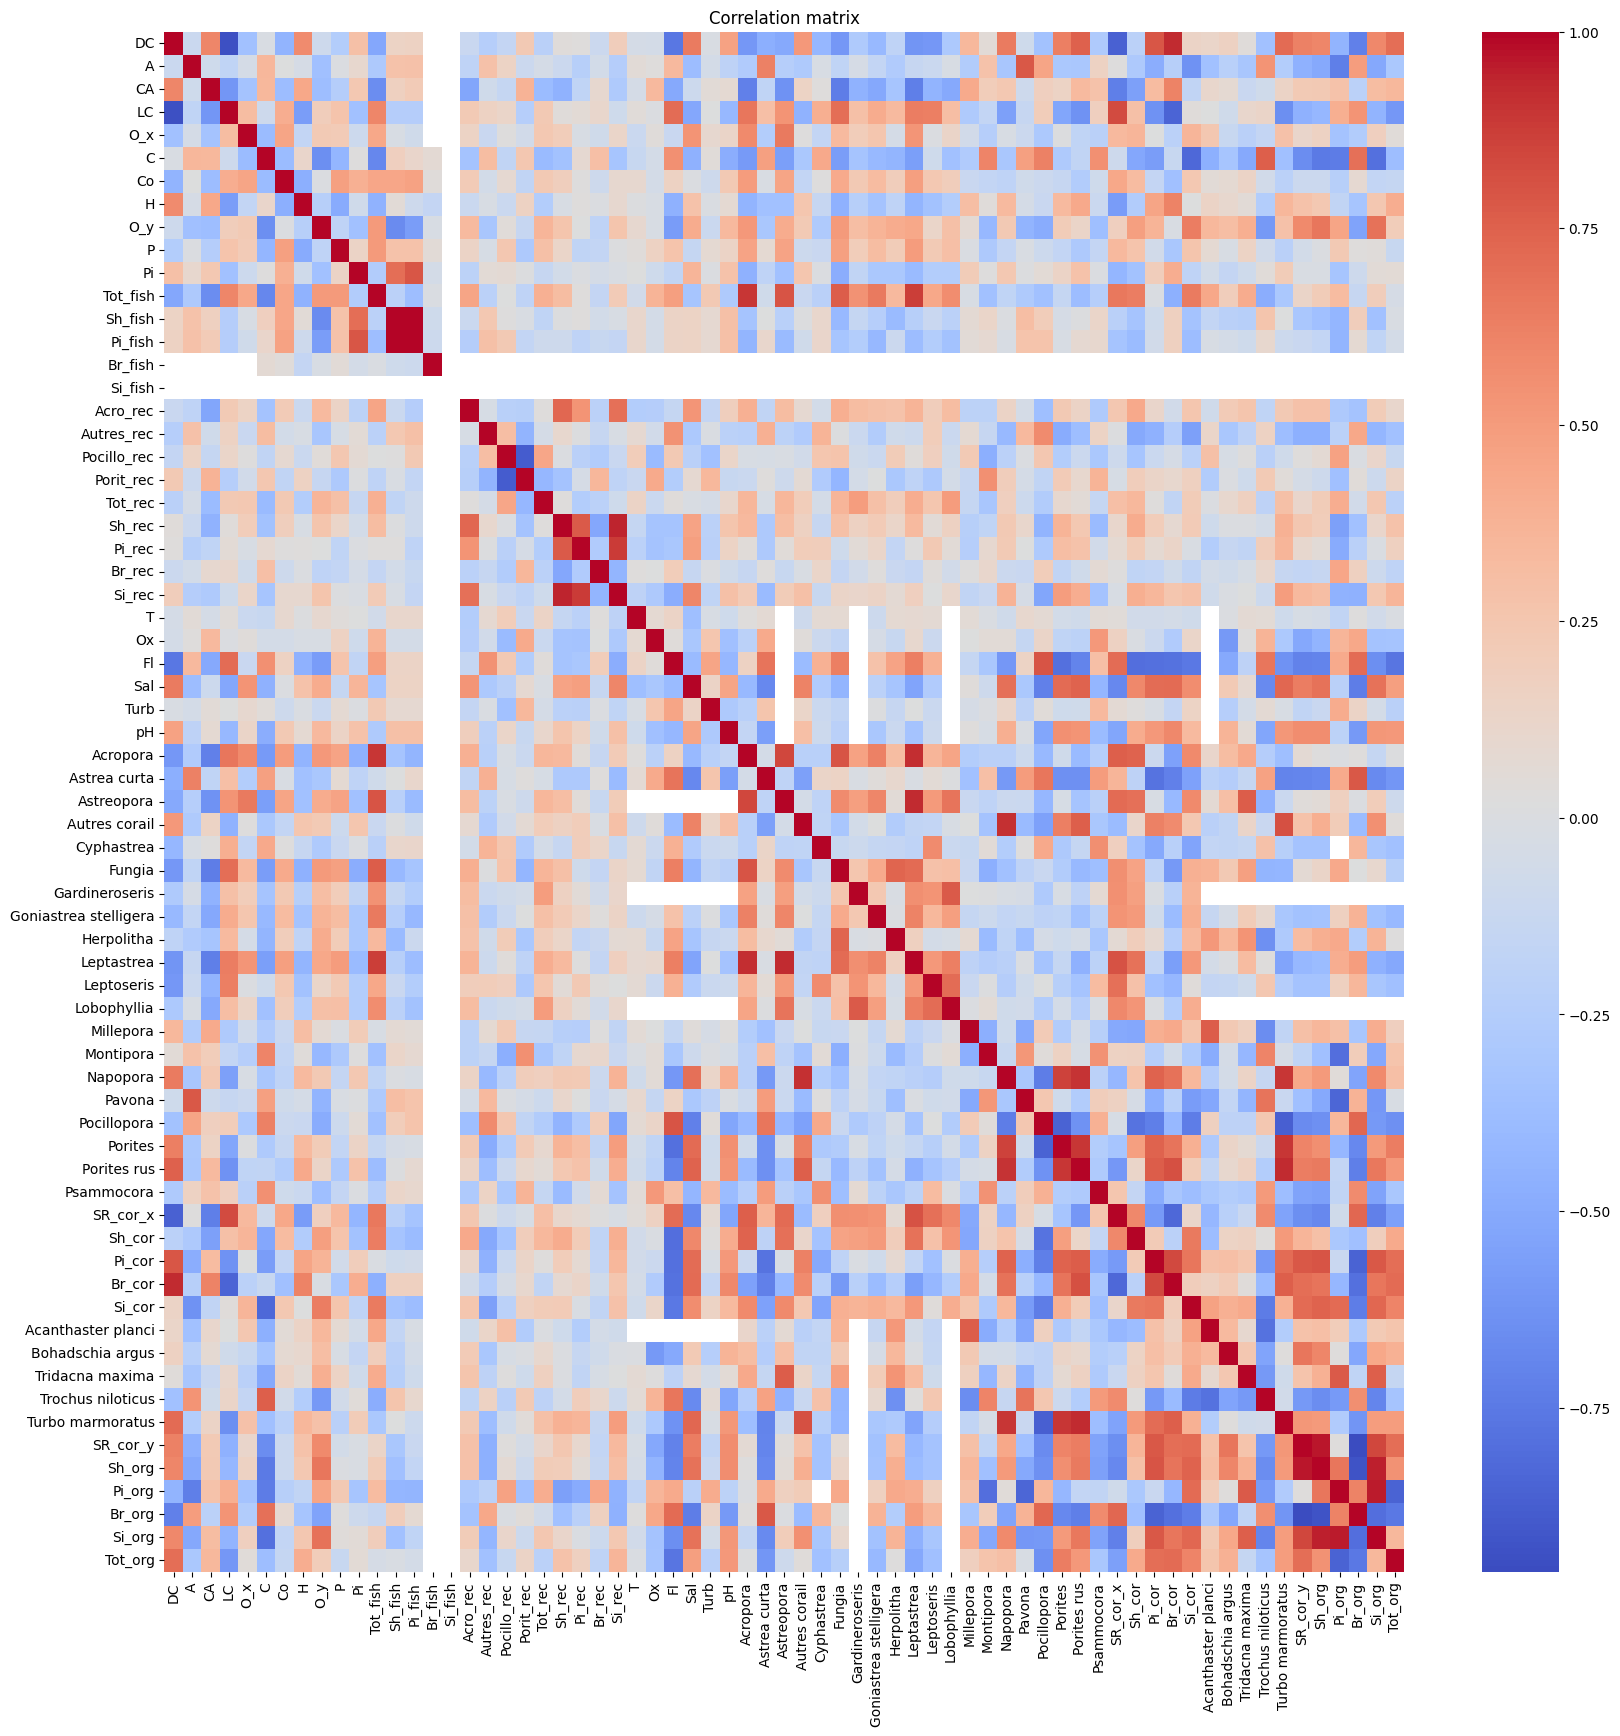

In [24]:
# plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Correlation matrix')

In [25]:
# define a function to find the best cross-correlation between LC and other parameters, compute the cross-correlation by lagging the time series
def cross_correlation(data, column1, column2, lag_max): # column2 should be LC
    cross_correlation = []
    lags = []
    for lag in range(lag_max):
        cross_correlation.append(data[column1].shift(lag).corr(data[column2]))
        lags.append(lag)
    return np.array([cross_correlation, lags])

In [26]:
cross_cor = cross_correlation(data, 'LC', 'Tot_fish', 50)

In [27]:
def find_lag(cross_cor):
    max_cross_cor = max(np.abs(cross_cor[0]))
    index = np.where(np.abs(cross_cor[0]) == max_cross_cor)
    return int(cross_cor[1][index][0])

def find_best_cross_correlation(cross_cor):
    max_cross_cor = max(np.abs(cross_cor[0]))
    index = np.where(np.abs(cross_cor[0]) == max_cross_cor)
    return cross_cor[0][index][0]

In [28]:
find_lag(cross_cor)

0

In [29]:
def lag_to_date(lag, data):
    delta = timedelta(days = lag * int((data.index.max() - data.index.min()).days/len(data.index)))
    years = int(delta.days/365)
    months = int((delta.days - years*365)/30)
    weeks = int((delta.days - years*365 - months*30)/7)
    days = int(delta.days - years*365 - months*30 - weeks*7)
    return f'{years} years, {months} months, {weeks} weeks'


In [30]:
def lag_to_year(lag, data):
    delta = timedelta(days = lag * int((data.index.max() - data.index.min()).days/len(data.index)))
    years = int(delta.days/365)
    return years

def lag_to_month(lag, data):
    delta = timedelta(days = lag * int((data.index.max() - data.index.min()).days/len(data.index)))
    months = int(delta.days/30)
    return months

In [31]:
def plot_with_best_lag(data, column1, column2, lag_max):
    cross_cor = cross_correlation(data, column1, column2, lag_max)
    best_lag = find_lag(cross_cor)
    plt.figure(figsize=(10, 5))
    plt.plot(data[column2].index, data[column2], label=column2)
    plt.plot(data[column2].index, data[column1].shift(best_lag), label=column1)
    plt.legend()
    plt.title('Best lag: ' + str(lag_to_date(best_lag, data)) + ' with a cross-correlation of ' + str(np.round(max(cross_cor[0]), 2)))

In [32]:
def plot_with_and_without_lag(data, column1, column2, lag_max):
    cross_cor = cross_correlation(data, column1, column2, lag_max)
    best_lag = find_lag(cross_cor)
    plt.figure(figsize=(10, 5))
    plt.plot(data[column2].index, data[column2], label=column2)
    plt.plot(data[column2].index, data[column1].shift(best_lag), label=column1)
    plt.plot(data[column2].index, data[column1], label=column1 + ' without lag')
    plt.legend()
    plt.title('Best lag: ' + str(lag_to_date(best_lag, data)) + ' with a cross-correlation of ' + str(np.round(max(cross_cor[0]), 2)))

In [33]:
# plot_with_and_without_lag(data, 'Tot_fish', 'LC', 50)
# plt.legend()

In [34]:
# def is_significant(cross_cor, threshold):
#     if max(cross_cor[0]) > threshold:
#         return True
#     else:
#         return False

# def is_significant_param(data, column1, column2, lag_max, threshold):
#     cross_cor = cross_correlation(data, column1, column2, lag_max)
#     return is_significant(cross_cor, threshold)

# for column in data.columns:
#     if is_significant_param(data, column, 'LC', 100, 0.5):
#         plot_with_and_without_lag(data, column, 'LC', 100)
#         plt.show()

In [35]:
# # do the same but without the 2006-2010 period
# data.drop(data['2006-01-01':'2010-01-01'].index, inplace=True)
# for column in data.columns:
#     if is_significant_param(data, column, 'LC', 50, 0.5):
#         plot_with_and_without_lag(data, column, 'LC', 50)
#         plt.show()

In [36]:
# change infinity values to nan
data = data.replace([np.inf, -np.inf], np.nan)

In [37]:
data_lc = data['LC']
data_dc = data['DC']

# Build an ecosystem modeling

In [38]:
data_all = pd.read_csv('sub/substrat_out_1987-2023-annuel.csv')
data_atpp = pd.read_csv('sub/ATPP_sub_out_1991-2023_annuel.csv')

In [39]:
# rename date column
data_all.rename(columns={'YearSeason': 'Date'}, inplace=True)

In [40]:
data_all['Date'] = pd.to_datetime(data_all['Date']).dt.to_period('M').dt.to_timestamp()
data_atpp['Date'] = pd.to_datetime(data_atpp['Date']).dt.to_period('M').dt.to_timestamp()

In [41]:
data_merged = pd.merge(data_all, data_atpp, how='outer', on='Date')

In [42]:
data_merged = data_merged.set_index('Date')

In [43]:
data_merged = data_merged[['Turf_x', 'Turf_y']]

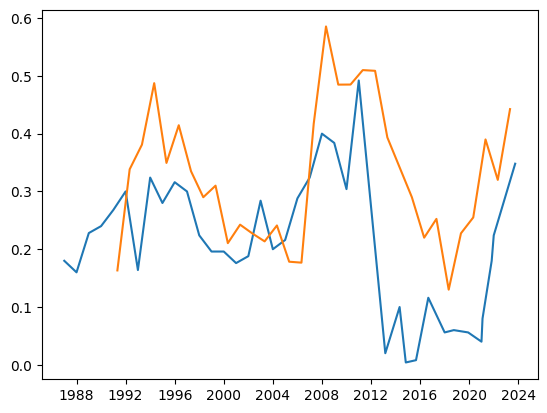

In [44]:
plt.plot(data_merged.index, data_merged['Turf_x'], label='Turf_x')
plt.plot(data_merged.index, data_merged['Turf_y'], label='Turf_y')

In [45]:
data_merged = data_merged.mean(axis=1)

In [46]:
# convert to dataframe
data_merged = pd.DataFrame(data_merged)

In [47]:
data_merged['DC'] = data['DC']

<Axes: xlabel='Date'>

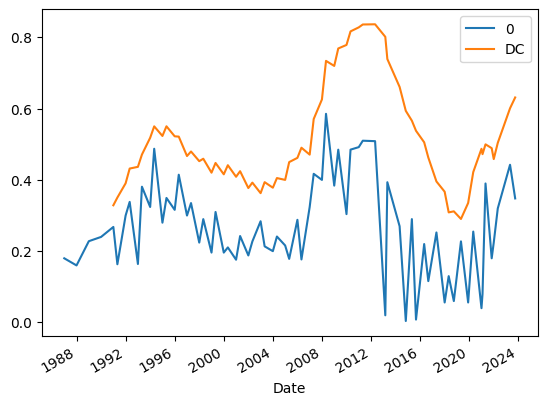

In [48]:
data_merged.plot()

In [49]:
data_merged[0]

Date
1987-01-01    0.1800
1988-01-01    0.1600
1989-01-01    0.2280
1990-01-01    0.2400
1991-01-01    0.2680
               ...  
2019-05-01    0.2275
2020-05-01    0.2550
2021-05-01    0.3900
2022-05-01    0.3200
2023-05-01    0.4425
Name: 0, Length: 70, dtype: float64

In [50]:
data['Turf'] = data_merged[0]

In [51]:
data['Turf'].interpolate(method='time', inplace=True)

In [52]:
data['Space available'] = data['DC'] - data['Turf']

In [53]:
data_model = data[['LC', 'Tot_fish', 'Tot_rec', 'A', 'CA', 'H', 'Sh_cor', 'Turf', 'Space available']]

In [54]:
data_model.rename(columns={'LC': 'Stock', 'A': 'Algae', 'H': 'Herbivory', 'Sh_cor': 'Habitat complexity', 'Tot_fish': 'Fish population', 'Tot_rec': 'Recruitment rate', 'CA' : 'Calcified Algae'}, inplace=True)

C:\Users\alexi\AppData\Local\Temp\ipykernel_26876\2672847563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.rename(columns={'LC': 'Stock', 'A': 'Algae', 'H': 'Herbivory', 'Sh_cor': 'Habitat complexity', 'Tot_fish': 'Fish population', 'Tot_rec': 'Recruitment rate', 'CA' : 'Calcified Algae'}, inplace=True)


In [55]:
data_model.columns

Index(['Stock', 'Fish population', 'Recruitment rate', 'Algae',
       'Calcified Algae', 'Herbivory', 'Habitat complexity', 'Turf',
       'Space available'],
      dtype='object')

In [56]:
data_model['Stock'] = data_model['Stock'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Algae'] + data_model['Turf'] + data_model['Space available'])
data_model['Algae'] = data_model['Algae'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Algae'] + data_model['Turf'] + data_model['Space available'])
data_model['Calcified Algae'] = data_model['Calcified Algae'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Algae'] + data_model['Turf'] + data_model['Space available'])
data_model['Turf'] = data_model['Turf'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Algae'] + data_model['Turf'] + data_model['Space available'])
data_model['Space available'] = data_model['Space available'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Algae'] + data_model['Turf'] + data_model['Space available'])

C:\Users\alexi\AppData\Local\Temp\ipykernel_26876\3543917014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['Stock'] = data_model['Stock'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Algae'] + data_model['Turf'] + data_model['Space available'])
C:\Users\alexi\AppData\Local\Temp\ipykernel_26876\3543917014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['Algae'] = data_model['Algae'] / (data_model['Stock'] + data_model['Algae'] + data_model['Calcified Al

<Axes: xlabel='Date'>

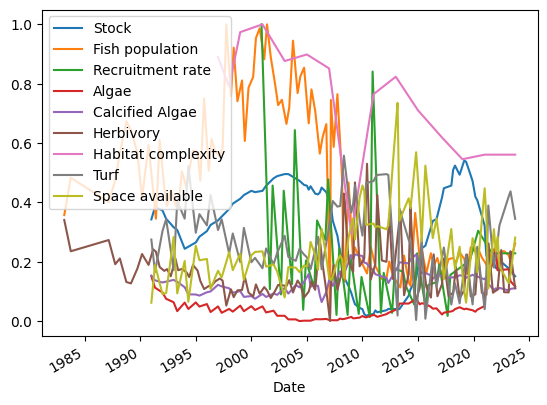

In [57]:
data_model.plot()

In [58]:
# select all data between 1991 and 2019
data_model = data_model['1991-01-01':'2019-01-01']

<Axes: xlabel='Date'>

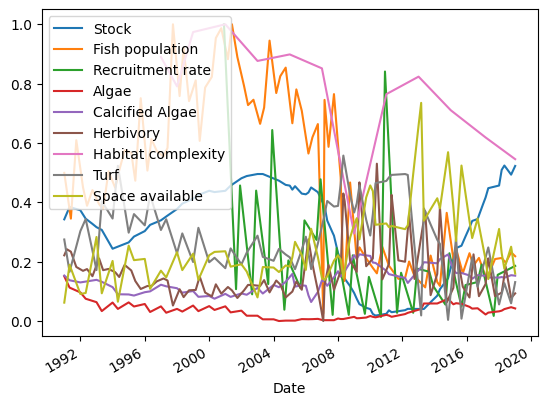

In [59]:
data_model.plot()

In [60]:
# extend data_model to a table with data each month between 1991 and 2019, and interpolate the missing values
# create a new dataframe with all the dates between 1991 and 2019
dates = pd.date_range('1991-01-01', '2019-01-01', freq='M')

data_2 = data_model.copy()

# add missing dates to the dataframe
for date in dates:
    if date not in data_2.index:
        data_2.loc[date] = np.nan

data_2.interpolate(method='time', inplace=True)


<Axes: xlabel='Date'>

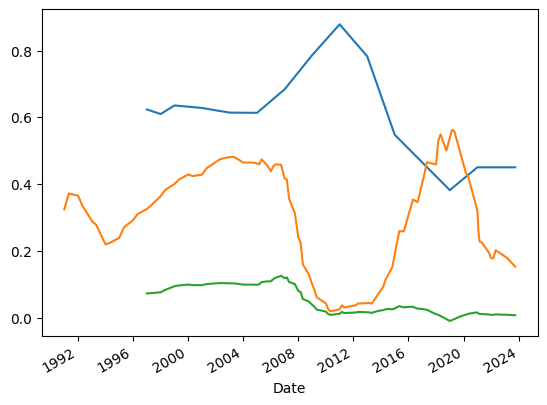

In [61]:
data['Pi_cor'].plot()
data['LC'].plot()
# plot multiplication of Pi_cor and LC
((data['Pi_cor'] - 0.4) * data['LC']).plot()

In [62]:
# trier les lignes
data_2 = data_2.sort_index()

In [63]:
# data_2.to_csv('data_model.csv')

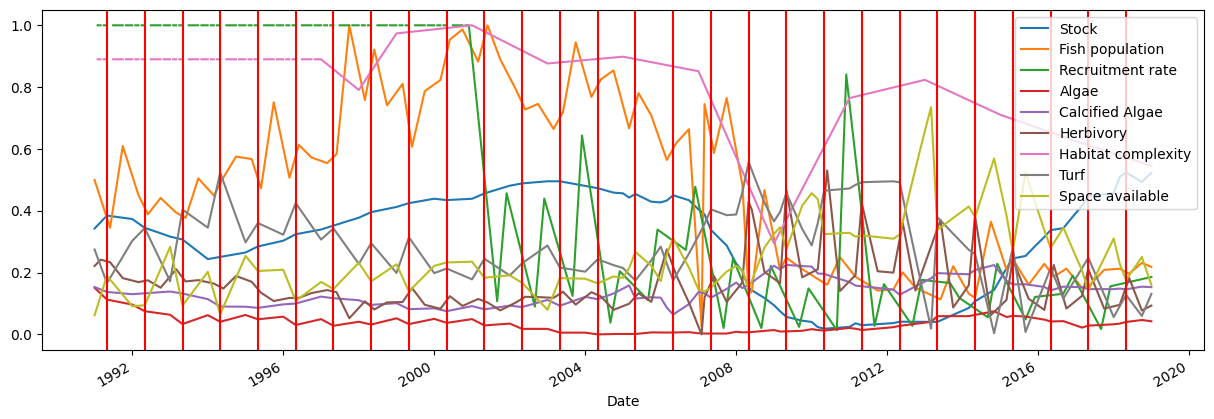

In [64]:
data_2.plot(figsize=(15, 5))

# plot a vertical line each summer
for i in range(1991, 2019):
    plt.axvline(pd.to_datetime(str(i) + '-05-01'), color='r')

In [65]:
(data_2.index.max() - data_2.index.min()).days*1/508

20.131889763779526

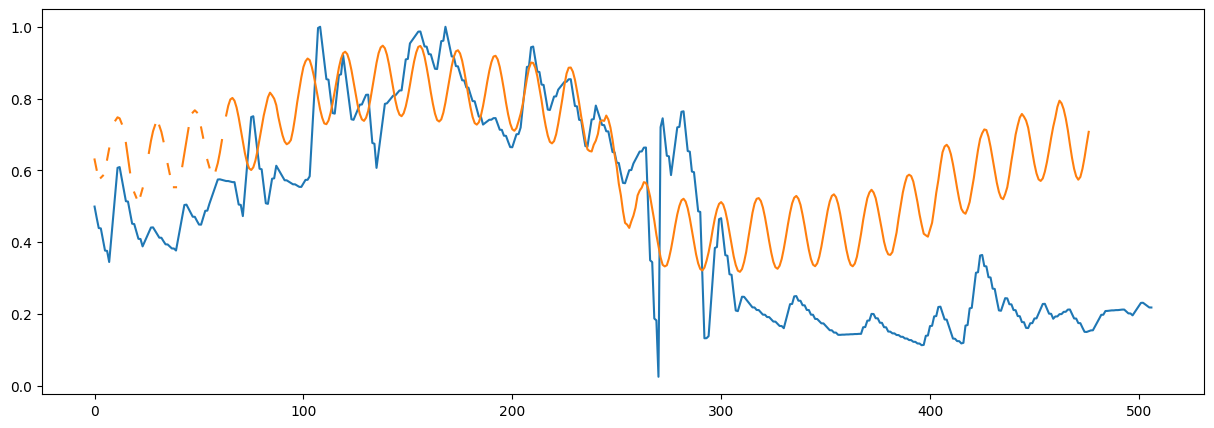

In [66]:
# try to model fish population using the coral stock and an annual variation of period 1 year, with maximum in october 1st
 # create the general model, a sinusoidal function with a period of 1 year, and a maximum in october 1st
def model(x, amp1, amp2, period1 , period2, phase1, phase2, offset):
    return amp1 * np.sin(2 * np.pi * x / period1 + phase1) + amp2 * np.sin(2 * np.pi * x / period2 + phase2) + offset

# # fit the model to the data
from scipy.optimize import curve_fit

x = np.arange(len(data_2))
y = data_2['Fish population']

popt, pcov = curve_fit(model, x, y)

# plot the model
plt.figure(figsize=(15, 5))
plt.plot(x, y, label='Data')
# plt.plot(x, model(x, 0.3, 0.12, 500, 18, 100, 10, 0.4), label='Model', color='r')
# plt.plot(x, model(x, *popt), label='Fitted model', color='g')
# plt.legend()

# define a function whose amplitude increases with the mean of the sinusoidal function over a period


# add to model a sinusoidal function with an adaptative amplitude
model_ = model(x, *popt) + 0.2 * np.sin(2 * np.pi * x / 18 + 10)

# # plot the model
# plt.figure(figsize=(15, 5))
# plt.plot(x, y, label='Data')
# plt.plot(x, model_, label='Model', color='r')

# # plot the stock
# plt.plot(x, data_2['Stock'].shift(-30))

# plot the herbivory
plt.plot(x, ((data_2['Habitat complexity'] * data_2['Stock']).shift(-30) + 0.4 + 0.1 * np.sin(2 * np.pi * x / 18 + 10)))



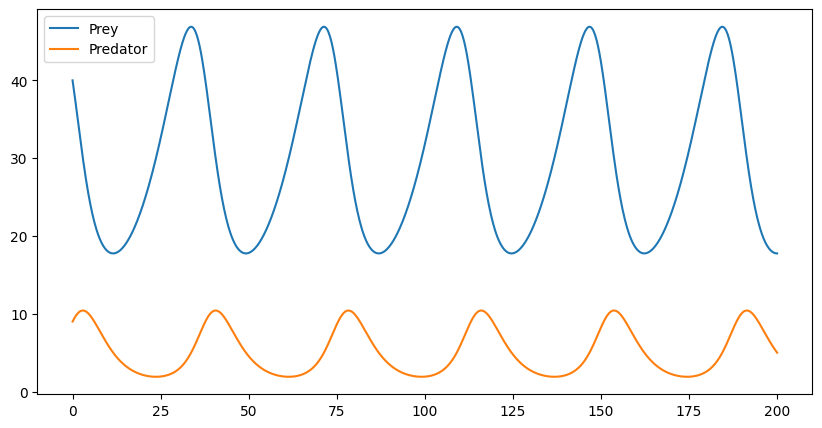

In [67]:
# Lotka Volterra model
def lotka_volterra(x, t, a, b, c, d):
    return a * x[0] - b * x[0] * x[1], -c * x[1] + d * x[0] * x[1]

# define the parameters
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# define the initial conditions
x0 = np.array([40, 9])

# define the time
t = np.linspace(0, 200, 1000)

# solve the system
from scipy.integrate import odeint
x = odeint(lotka_volterra, x0, t, args=(a, b, c, d))

# plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, x[:, 0], label='Prey')
plt.plot(t, x[:, 1], label='Predator')
plt.legend()

<Axes: xlabel='Date'>

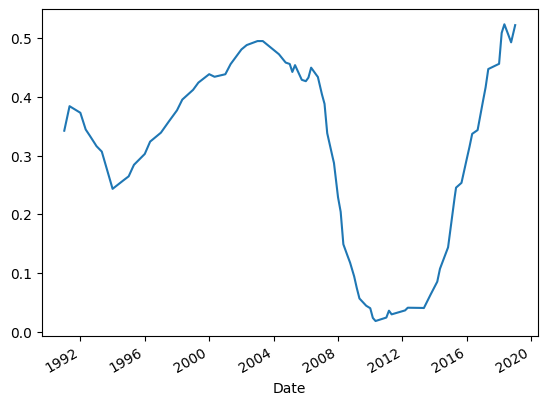

In [68]:
data_2['Stock'].plot()

In [69]:
data_2.columns

Index(['Stock', 'Fish population', 'Recruitment rate', 'Algae',
       'Calcified Algae', 'Herbivory', 'Habitat complexity', 'Turf',
       'Space available'],
      dtype='object')

In [70]:
# create a normalized dataframe
data_norm = data_2.copy()
for column in data_norm.columns:
    data_norm[column] = (data_norm[column] - data_norm[column].min()) / (data_norm[column].max() - data_norm[column].min())

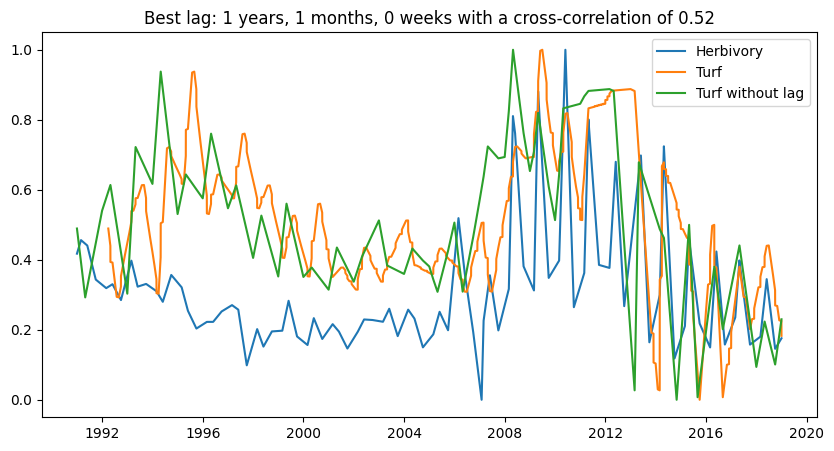

In [71]:
column1 = 'Turf'
column2 = 'Herbivory'

# compute cross correlations
cross_cor = cross_correlation(data_norm, column1, column2, 50)

# find the best lag
find_lag(cross_cor)

# plot the best lag
plot_with_and_without_lag(data_norm, column1, column2, 50)


Text(0, 0.5, 'Predictors')

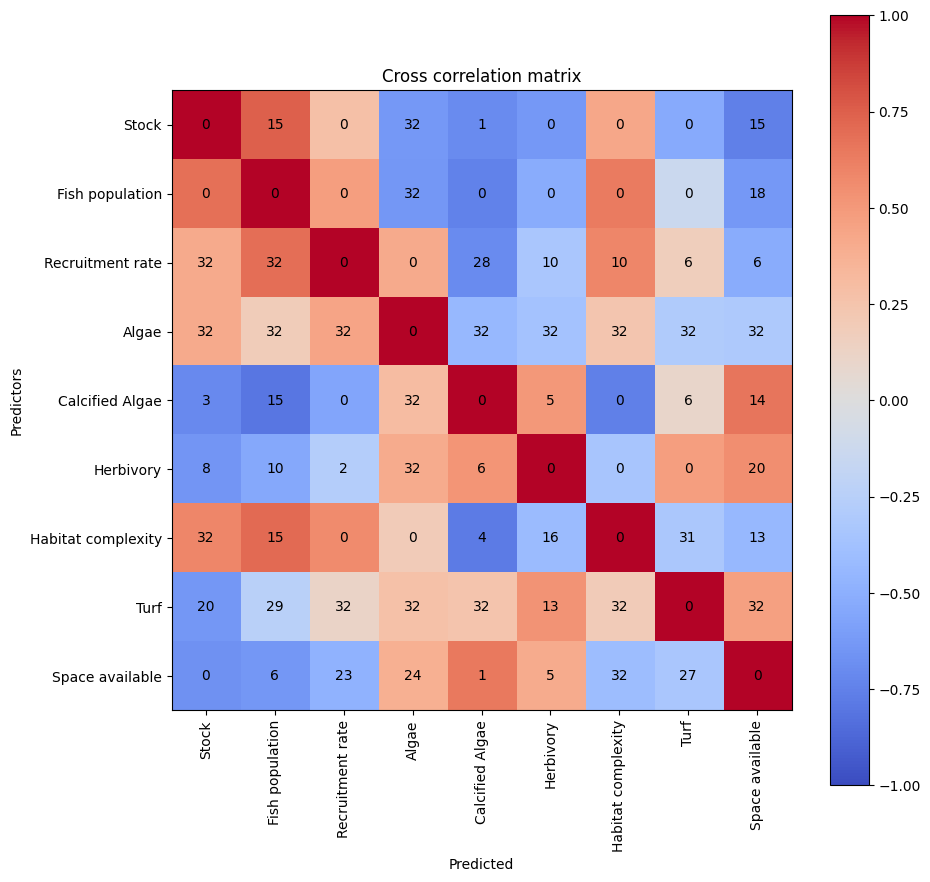

In [72]:
# build cross correlation matrix
cross_cor_matrix = np.zeros((len(data_norm.columns), len(data_norm.columns)))
best_lag_matrix = np.zeros((len(data_norm.columns), len(data_norm.columns)))
for i, column1 in enumerate(data_norm.columns):
    for j, column2 in enumerate(data_norm.columns):
        cross_cor = cross_correlation(data_norm, column1, column2, 50)
        cross_cor_matrix[i, j] = find_best_cross_correlation(cross_cor)
        # stock the best lag
        best_lag_matrix[i, j] = lag_to_month(find_lag(cross_cor), data_norm)

# plot the cross correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(cross_cor_matrix, cmap='coolwarm')
plt.colorbar()
plt.clim(-1, 1)
# legends
plt.xticks(range(len(data_norm.columns)), data_norm.columns, rotation=90)
plt.yticks(range(len(data_norm.columns)), data_norm.columns)
# put in each case the best lag
for i in range(len(data_norm.columns)):
    for j in range(len(data_norm.columns)):
        plt.text(j, i, str(int(best_lag_matrix[i, j])), ha='center', va='center', color='black')
plt.title('Cross correlation matrix')
# name axis
plt.xlabel('Predicted')
plt.ylabel('Predictors')


<Axes: xlabel='Date'>

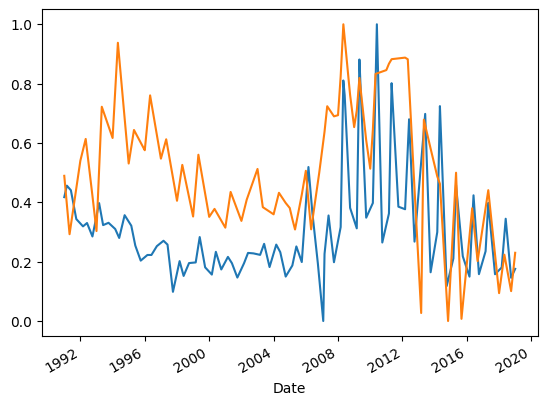

In [73]:
data_norm['Herbivory'].plot()
data_norm['Turf'].plot()

In [74]:
# create a new dataframe in which the columns are lagged by the best lag regarding stock as predicted variable
data_lagged = data_norm.copy()
for i, column in enumerate(data_norm.columns):
    if column != 'Stock':
        data_lagged[column] = data_lagged[column].shift(int(best_lag_matrix[i, 0]))

In [75]:
data_lagged = data_lagged.bfill()

In [76]:
def phi(x):
    return (np.exp(0.5*x) - 1) / x

C:\Users\alexi\AppData\Local\Temp\ipykernel_26876\2181872188.py:2: RuntimeWarning: invalid value encountered in divide
  return (np.exp(0.5*x) - 1) / x


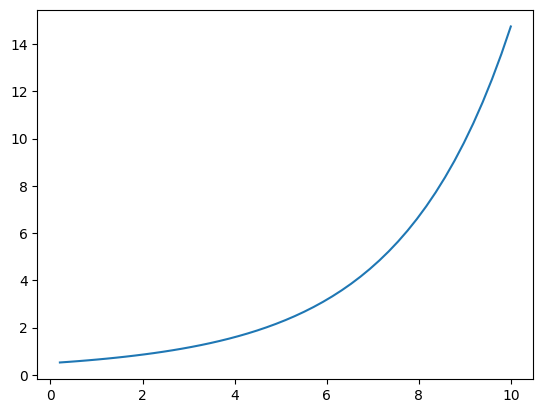

In [77]:
# plot phi
plt.plot(np.linspace(0, 10), phi(np.linspace(0, 10)))

In [78]:
def s(n, variable, interet, data):

    # data = dataframe contenant toutes les variables
    # variable = nom de la colonne de la variable explicative dans data
    # interet = nom de la colonne de la variable cible dans data
    # n = nombre de bins désirées

    var_discrete = np.linspace(data[variable].min(), data[variable].max(), n)

    esperance = []
    bins = [] # contient le nombre de valeur dans chaque bins
    var_bins = [] # contient les valeurs de variables de chaque bins

    for i in range(n - 2):
        esp = data[interet][(data[variable] >= var_discrete[i])&(data[variable] < var_discrete[i + 1])].mean()
        count = data[interet][(data[variable] >= var_discrete[i])&(data[variable] < var_discrete[i + 1])].count()
        var = np.array(data[variable][(data[variable] >= var_discrete[i])&(data[variable] < var_discrete[i + 1])])
        esperance.append(esp)
        bins.append(count)
        var_bins.append(var.astype('float'))
    
    esp = data[interet][(data[variable] >= var_discrete[n - 2])&(data[variable] <= var_discrete[n - 1])].mean()
    count = data[interet][(data[variable] >= var_discrete[n - 2])&(data[variable] <= var_discrete[n - 1])].count()
    var = np.array(data[variable][(data[variable] >= var_discrete[n - 2])&(data[variable] <= var_discrete[n - 1])])
    esperance.append(esp)
    bins.append(count)
    var_bins.append(var.astype('float'))

    return(esperance, bins, var_bins)

def interpol(esperance, var_bins):
    var_centre = []
    for i in range(len(var_bins)):
        if len(var_bins[i]) !=0:
            var_centre.append(var_bins[i][len(var_bins[i])//2])
    
    interp_func = interp1d(var_centre, [x for x in esperance if not pd.isna(x)], kind='linear', fill_value='extrapolate')

    # Espérance interpolée pour toutes les valeurs de DHW
    esperance_interpolation = interp_func(np.unique(np.concatenate(var_bins)))

    return(esperance_interpolation, np.unique(np.concatenate(var_bins)))

def entrainement(n, data_train, variables, interet):
    esperances = []
    val_interpol = []
    for i in range(len(variables)):
        esperance, bins, var_bins = s(n, variables[i],interet, data_train)
        interpolation = interpol(esperance, var_bins)
        esperances.append(interpolation[0])
        val_interpol.append(interpolation[1])
    
    return(esperances, val_interpol)

def F(x, esperance_interpol, val_interpol):
    for i in range(len(val_interpol)):
        if val_interpol[i] > x:
            return(esperance_interpol[i - 1])
        elif x >= val_interpol[-1]:
            return(esperance_interpol[-1])
    return('erreur')

def prediction(n, variables, interet, data_train, data):

    # n = nombre de bins considérées (= 10)
    # variables qu'on considère pour expliquer le gradient de la mortalité (gradient ici) en format liste de str
    # variable d'intéret est la variable qu'on cherche à prédire (gradient de la mortalité) en format str
    # data_train = tableau pandas contenant les variables et la variables d'intéret sur lequel on entraine le modèle
    # data = tableau pandas contenant les variables aux temps auxquels on veut prédire la variable d'intéret

    esperances, val_interpol = entrainement(n, data_train, variables, interet)
    mort = []
    for k in range(len(data)):
        somme = 0
        for i in range(len(variables)):
            somme += F(data[variables[i]].iloc[k], esperances[i], val_interpol[i])
        mort.append(somme)
    return(mort)
    

In [79]:
# Import necessary libraries
import numpy as np
from scipy.interpolate import interp1d

# Define a class for hard coral growth
class HardCoralGrowth:

    def __init__(self, base, sensibility):
        self.origin = base
        self.base = base  # Basic growth rate
        self.history = [self.base]  # Store growth rate history
        self.sensibility = sensibility
    
    def update(self, bleaching_pressure, environmental_factors):
       # Reduce growth rate during bleaching events
        if bleaching_pressure > 0:
            self.base *= self.sensibility

        else:
            self.base = self.origin

        # if environmental_factors['temperature'] > 28 :
        #     self.base *= 1.1
        # elif environmental_factors['temperature'] < 27 :
        #     self.base *= 0.9

        
        return self.base
    
    def save(self):
        # Save model state
        self.history.append(self.base)

# Define a class for hard coral recruitment
class HardCoralRecruitment:
    def __init__(self, base, sensi_space, sensi_herbivory, sensi_complexity, sensi_stock, threshold_complexity,
                 threshold_space, threshold_herbivory, threshold_stock):
        self.base = base  # Basic recruitment rate
        self.history = [self.base]  # Store recruitment rate history
        self.sensi_space = sensi_space
        self.sensi_herbivory = sensi_herbivory
        self.sensi_complexity = sensi_complexity
        self.sensi_stock = sensi_stock
        self.threshold_complexity = threshold_complexity
        self.threshold_space = threshold_space
        self.threshold_herbivory = threshold_herbivory
        self.threshold_stock = threshold_stock
    
    def update(self, environmental_factors, space_available, habitat_complexity, stock_value, herbivory_rate):
        if environmental_factors['COTS'] == 1 :
            self.base = 0.1
        self.base *= 1 + (space_available - self.threshold_space) * self.sensi_space
        self.base *= 1 + (self.threshold_herbivory - herbivory_rate) * self.sensi_herbivory  
        self.base *= 1 + (habitat_complexity - self.threshold_complexity) * self.sensi_complexity
        self.base *= 1 + (stock_value - self.threshold_stock) * self.sensi_stock
        if environmental_factors['temperature'] > 28 :
            self.base *= 1.1
        elif environmental_factors['temperature'] < 27 :
            self.base *= 0.9
        
        return self.base

    def save(self):
        # Save model state
        self.history.append(self.base)

# Define a class for hard coral mortality
class HardCoralMortality:
    def __init__(self, base, sensi_bleaching):
        self.origin = base
        self.base = base
        self.history = [self.base]
        self.sensi_bleaching = sensi_bleaching
    
    def update(self, environmental_factors, bleaching_pressure):
        if environmental_factors['COTS'] == 1 :
            self.base = 0.8

        # if environmental_factors['storms'] == 1 :
        #     self.sensi_bleaching += 0.2
        # Define coral mortality due to bleaching
        if bleaching_pressure > 0:
            # self.base *= (1+bleaching_pressure) * self.sensi_bleaching
            self.base *= 1 + self.sensi_bleaching
        else:
            self.base = self.origin

        
        return self.base
    
    def save(self):
        # Save model state
        self.history.append(self.base)
    

# Define a class for algae community dynamics
class AlgaeCommunityDynamics:
    def __init__(self, sensi_coral, sensi_herb, sensi_houle, nat_growth, type):
        self.type = type
        if self.type == 'turf':
            self.base = 0.27
        elif self.type == 'calc':
            self.base = 0.15
        else:
            self.base = 0.15
        self.sensi_coral = sensi_coral
        self.sensi_herb = sensi_herb
        self.sensi_houle = sensi_houle
        self.history = [self.base]
        self.nat_growth = nat_growth
    
    def update(self, environmental_factors, stock_value, herbivory_rate):

        if self.type == 'turf':
            # self.base *= 1 - herbivory_rate*self.sensi_herb * 10
            self.base = (1 + self.nat_growth*phi(self.nat_growth))*self.base/(1 + phi(self.nat_growth)*(self.base*self.nat_growth/0.3 + self.nat_growth*stock_value*self.sensi_coral/0.3 + herbivory_rate*self.sensi_herb))
        elif self.type == 'calc':
            # self.base *= 1 - herbivory_rate*self.sensi_herb
            self.base = (1 + self.nat_growth*phi(self.nat_growth))*self.base/(1 + phi(self.nat_growth)*(self.base*self.nat_growth/0.1 + self.nat_growth*stock_value*self.sensi_coral/0.1 + herbivory_rate*self.sensi_herb))
        else:
            # self.base *= 1 - herbivory_rate*self.sensi_herb * 5
            self.base = (1 + self.nat_growth*phi(self.nat_growth))*self.base/(1 + phi(self.nat_growth)*(self.base*self.nat_growth/0.05 + self.nat_growth*stock_value*self.sensi_coral/0.05 + herbivory_rate*self.sensi_herb))


        self.base *= self.sensi_houle * (1 - environmental_factors['houle'])

        if environmental_factors['temperature'] > 28 :
            self.base *= 1.1
        elif environmental_factors['temperature'] < 27 :
            self.base *= 0.9

        return self.base
    
    def save(self):
        self.history.append(self.base)

# Define a class for herbivory
class Herbivory:
    def __init__(self, nat_growth, coef, pisc):
        self.base = 0.22
        self.history = [self.base]
        self.nat_growth = nat_growth
        self.coef = coef
        self.pisc = pisc
        self.alg = 1
    
    def update(self, environmental_factors, habitat_complexity, algae, calc_algae, turf, fish):

        # if habitat_complexity < 0.5:
        #     self.base *= 0.7
        # if environmental_factors['temperature'] > 30:
        #     self.base *= 0.8
        # if environmental_factors['dhw'] > 4:
        #     self.base *= 0.9

        self.base *= (1 - phi(self.nat_growth) * self.coef)/(1 + phi(self.nat_growth)*(fish*self.pisc - (algae+turf+calc_algae)*self.alg))


        # if environmental_factors['temperature'] > 28 :
        #     self.base *= 1.1
        # elif environmental_factors['temperature'] < 27 :
        #     self.base *= 0.9

        return self.base
    
    def save(self):
        # Save model state
        self.history.append(self.base)

# Define a class for fish population dynamics
class FishPopulationDynamics:
    def __init__(self):
        self.base = 0.5
        self.history = [self.base]
    
    def update(self, environmental_factors, stock, habitat_complexity):
        if self.base > 0.8:
            self.base *= 0.9
        else :
            self.base *= 1.1
        if habitat_complexity < 0.5:
            self.base *= 0.6
        if environmental_factors['temperature'] > 30:
            self.base *= 0.7
        if environmental_factors['dhw'] > 4:
            self.base *= 0.8
        if environmental_factors['temperature'] > 28 :
            self.base *= 1.1
        elif environmental_factors['temperature'] < 27 :
            self.base *= 0.9
        return self.base

    def save(self):
        # Save model state
        self.history.append(self.base)

# Define a class for habitat complexity
class HabitatComplexity:
    def __init__(self):
        self.base = 0.5
        self.history = [self.base]
    
    def update(self, environmental_factors, stock):
        if environmental_factors['storms'] > 0.5:
            self.base *= 0.5
        if environmental_factors['COTS'] == 1:
            self.base *= 0.6
        if environmental_factors['temperature'] > 30:
            self.base *= 0.7
        if stock > 0.5:
            self.base *= 0.9

        return self.base
    
    def save(self):
        # Save model state
        self.history.append(self.base)

class Space_available:
    def __init__(self):
        self.base = 0.06
        self.history = [self.base]

    def update(self, algae_coverage, stock, calc_algae, turf):
        self.base = 1 - algae_coverage - stock - calc_algae - turf
        return self.base
    
    def save(self):
        # Save model state
        self.history.append(self.base)

  
class Stock:
    def __init__(self, HA, sensi_cor_alg):
        self.base = 0.34
        self.history = [self.base]
        self.sensi_alg = sensi_cor_alg
        self.HA = HA
    
    # Implement stock dynamics based on provided information
    def update(self, mortality_rate, growth_rate, algae, calc_algae, turf):
        growth_rate -= mortality_rate
        # self.base *= 1 - mortality_rate + growth_rate 
        self.base *= (1+phi(growth_rate)*growth_rate)/(1+phi(growth_rate)*(self.base*growth_rate/0.5 + (self.sensi_alg*growth_rate/0.5)*(algae + calc_algae + turf/(algae + calc_algae + turf + self.HA))))

        return self.base
    
    def save(self):
        # Save model state
        self.history.append(self.base)




class BiologicalDynamicModel:
    def __init__(self, len_history=32, bleaching_pressure=0, base_growth=0.1,
      base_mortality = 0.05, sensi_growth_bleaching=0.5, sensi_mortality_bleaching=1, sensi_houle_alg = 1, sensi_coral_alg=1,
      sensi_herb_alg=1, nat_g_alg=1.1, nat_g_h=1.1, HA = 1, sensi_cor_alg=1, coef_h=0.1, pisc=0.1):

        # internal state
        self.growth = HardCoralGrowth(base_growth, sensi_growth_bleaching)
        # self.recruitment = HardCoralRecruitment(base_recruitment, sensi_space_rec, sensi_herbivory_rec, sensi_complexity_rec, sensi_stock_rec,
        # threshold_complexity, threshold_space, threshold_herbivory, threshold_stock)
        self.mortality = HardCoralMortality(base_mortality, sensi_mortality_bleaching)
        self.algae = AlgaeCommunityDynamics(sensi_coral_alg, sensi_herb_alg, sensi_houle_alg, nat_g_alg, type = 'algae')
        self.herbivory = Herbivory(nat_g_h, coef_h, pisc)
        self.fish = FishPopulationDynamics()
        self.habitat_complexity = HabitatComplexity()
        self.space_available = Space_available()
        self.stock = Stock(HA, sensi_cor_alg)
        self.calc_algae = AlgaeCommunityDynamics(sensi_coral_alg, sensi_herb_alg, sensi_houle_alg, nat_g_alg, type = 'calc')
        self.turf = AlgaeCommunityDynamics(sensi_coral_alg, sensi_herb_alg, sensi_houle_alg, nat_g_alg,type = 'turf')

        # environmental factors
        self.threshold_dhw_low = 1.5
        self.threshold_dhw_high = 2
        self.bleaching_pressure = bleaching_pressure
        self.storms = 0
        self.temperature = 28
        self.dhw = 0
        self.COTS = 0
        self.houle = 0

        self.environmental_factors = {'COTS' : self.COTS, 'temperature' : self.temperature, 'dhw' : self.dhw, 'storms' : self.storms,
                                         'houle' : self.houle}
        # self.internal_factors = {'space_available' : self.space_available, 'stock' : self.stock.base,
        #                         'habitat_complexity' : self.habitat_complexity.base, 'herbivory' : self.herbivory.base,
        #                         'algal_coverage' : self.algae.base, 'recruitment_rate' : self.recruitment.base,
        #                         'growth_rate' : self.growth.base, 'mortality_rate' : self.mortality.base,
        #                         'fish_population' : self.fish.base}
    
        # initialise by adding to all histories n times the initial values, to account for the delay in the model
        for _ in range(len_history-1):
            self.growth.save()
            self.mortality.save()
            # self.recruitment.save()
            self.algae.save()
            self.herbivory.save()
            self.fish.save()
            self.habitat_complexity.save()
            self.space_available.save()
            self.stock.save()
            self.calc_algae.save()
            self.turf.save()


    def update(self, environmental_factors):

        self.environmental_factors = environmental_factors

        # Update model state based on environmental factors
        self.bleaching_pressure = self.calculate_bleaching_intensity()

        # Modify growth and mortality rates based on bleaching intensity
        self.growth.update(self.bleaching_pressure, environmental_factors)
        self.mortality.update(environmental_factors, self.bleaching_pressure)
        # self.recruitment.update(environmental_factors, self.space_available.base, self.habitat_complexity.base, self.stock.base, self.herbivory.base)
        self.algae.update(environmental_factors, self.stock.base, self.herbivory.base)
        self.herbivory.update(environmental_factors, self.habitat_complexity.base, self.algae.base, self.calc_algae.base, self.turf.base, self.fish.base)
        self.fish.update(environmental_factors, self.stock.base, self.habitat_complexity.base)
        self.habitat_complexity.update(environmental_factors, self.stock.base)
        self.stock.update(self.mortality.base, self.growth.base, self.algae.base, self.calc_algae.base, self.turf.base)
        self.calc_algae.update(environmental_factors, self.stock.base, self.herbivory.base)
        self.turf.update(environmental_factors, self.stock.base, self.herbivory.base)
        self.space_available.update(self.algae.base, self.stock.base, self.calc_algae.base, self.turf.base)

        # save all
        self.growth.save()
        self.mortality.save()
        # self.recruitment.save()
        self.algae.save()
        self.herbivory.save()
        self.fish.save()
        self.habitat_complexity.save()
        self.space_available.save()
        self.stock.save()
        self.calc_algae.save()
        self.turf.save()
        

    
    def calculate_bleaching_intensity(self):
        # Calculate bleaching intensity based on environmental factors
        # Code implementation needed based on provided information
        bleaching_intensity = 0
        if self.environmental_factors['dhw'] >= self.threshold_dhw_high:
            bleaching_intensity = 1
        elif self.environmental_factors['dhw'] >= self.threshold_dhw_low:
            bleaching_intensity = 0.5
        return bleaching_intensity
    
    def run_model(self, time_steps, environmental_factors_history):
        # Run the model for a specified number of time steps
        # Implement model dynamics based on provided information
        for _ in range(time_steps):
            # Update model state based on environmental factors
            self.update(environmental_factors_history[_])
            # Implement other model dynamics based on provided information

    def return_len_histories(self):
        return len(self.growth.history), len(self.mortality.history), len(self.recruitment.history), len(self.algae.history), len(self.herbivory.history), len(self.fish.history), len(self.habitat_complexity.history), len(self.space_available.history), len(self.stock.history), len(self.calc_algae.history), len(self.turf.history)
    
    

    def table_results(self, rows=31):
        # Return model results in a table
        return pd.DataFrame({'growth' : self.growth.history[rows:], 'mortality' : self.mortality.history[rows:], 'Algae' : self.algae.history[rows:], 'Herbivory' : self.herbivory.history[rows:], 'Fish population' : self.fish.history[rows:], 'Habitat complexity' : self.habitat_complexity.history[rows:], 'Space available' : self.space_available.history[rows:], 'Stock' : self.stock.history[rows:], 'Calcified Algae' : self.calc_algae.history[rows:], 'Turf' : self.turf.history[rows:]})

    def plot_results(self, rows=31, growth=True, mortality=True, recruitment=True, algae=True, herbivory=True, fish=True, habitat_complexity=True, space_available=True, stock=True, calc_algae=True, turf=True):
        # Plot model results
        if growth:
            plt.plot(self.growth.history[rows:], label='growth')
        if mortality:
            plt.plot(self.mortality.history[rows:], label='mortality')
        # if recruitment:
        #     plt.plot(self.recruitment.history[rows:], label='recruitment')
        if algae:
            plt.plot(self.algae.history[rows:], label='algae', color = 'orange')
        if herbivory:
            plt.plot(self.herbivory.history[rows:], label='herbivory', color = 'brown')
        if fish:
            plt.plot(self.fish.history[rows:], label='fish', color = 'purple')
        if habitat_complexity:
            plt.plot(self.habitat_complexity.history[rows:], label='habitat_complexity')
        if space_available:
            plt.plot(self.space_available.history[rows:], label='space_available')
        if stock:
            plt.plot(self.stock.history[rows:], label='stock', color = 'b')
        if calc_algae:
            plt.plot(self.calc_algae.history[rows:], label='calc_algae', color = 'g')
        if turf:
            plt.plot(self.turf.history[rows:], label='turf', color = 'r')
        plt.legend()
    
        plt.legend()
        plt.show()
  

In [80]:
print(data_2.iloc[0])

Stock                 0.342616
Fish population       0.499323
Recruitment rate           NaN
Algae                 0.150753
Calcified Algae       0.153249
Herbivory             0.221316
Habitat complexity         NaN
Turf                  0.274754
Space available       0.061904
Name: 1991-01-01 00:00:00, dtype: float64


In [81]:
def temperature(mean, amplitude, period, time):
    return mean + amplitude * np.sin(2*np.pi/period * time)

environmental_factors_history = []
nb_years = 10
for j in range(nb_years):
    for i in range(12):
        environmental_factors_history.append({'COTS' : 0, 'temperature' : temperature(27.5, 1, 12, i), 'dhw' : 0, 'storms' : 0, 'houle' : 0})

In [82]:
# initialize the model according to the first row of data_2
model = BiologicalDynamicModel(bleaching_pressure=0, base_growth=0.1,  base_mortality = 0.05,
     sensi_growth_bleaching=0.5, sensi_mortality_bleaching=1, sensi_houle_alg = 1, sensi_coral_alg=0., sensi_herb_alg=0.1,
     nat_g_alg=2, nat_g_h=2, HA=0.1, sensi_cor_alg=0.05, coef_h=0.35, pisc=0.12)

In [83]:
# run the model
model.run_model(120, environmental_factors_history)

model.table_results()

,growth,mortality,Algae,Herbivory,Fish population,Habitat complexity,Space available,Stock,Calcified Algae,Turf
0,0.1,0.05,0.150000,0.220000,0.500000,0.5,0.060000,0.340000,0.150000,0.270000
1,0.1,0.05,0.066045,0.242672,0.550000,0.5,0.192630,0.342131,0.113316,0.285878
2,0.1,0.05,0.054559,0.254475,0.605000,0.5,0.205235,0.344233,0.103749,0.292223
3,0.1,0.05,0.056316,0.264108,0.732050,0.5,0.162745,0.346308,0.110580,0.324050
4,0.1,0.05,0.056927,0.282768,0.885781,0.5,0.145269,0.348336,0.113066,0.336402
...,...,...,...,...,...,...,...,...,...,...
116,0.1,0.05,0.049655,0.283926,0.772486,0.5,0.099086,0.454088,0.099293,0.297878
117,0.1,0.05,0.044484,0.283563,0.764761,0.5,0.145320,0.454340,0.088964,0.266892
118,0.1,0.05,0.042626,0.269243,0.757113,0.5,0.161590,0.454617,0.085292,0.255875
119,0.1,0.05,0.041914,0.251400,0.749542,0.5,0.167603,0.454898,0.083896,0.251688


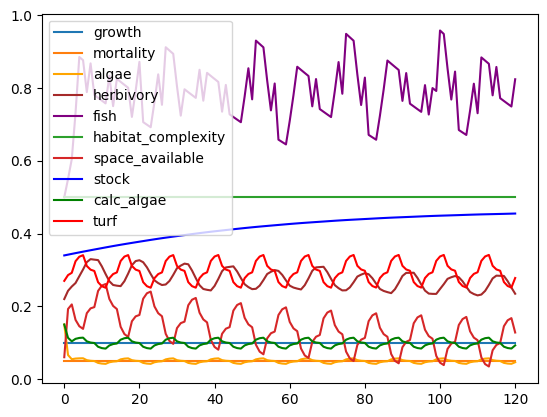

In [84]:
model.plot_results()

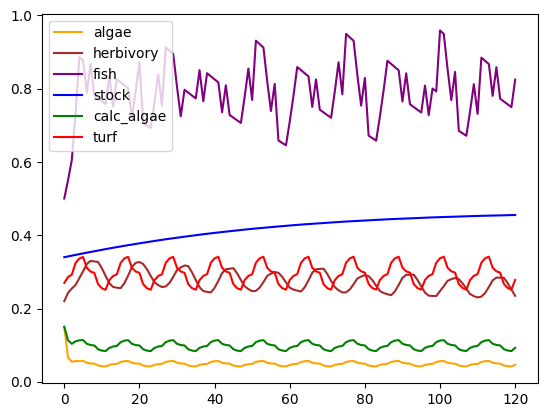

In [85]:
model.plot_results(turf=True, algae=True, stock=True, space_available=False, habitat_complexity=False, fish = True, herbivory=True, recruitment=True, mortality=False, growth=False)

<Axes: xlabel='Date'>

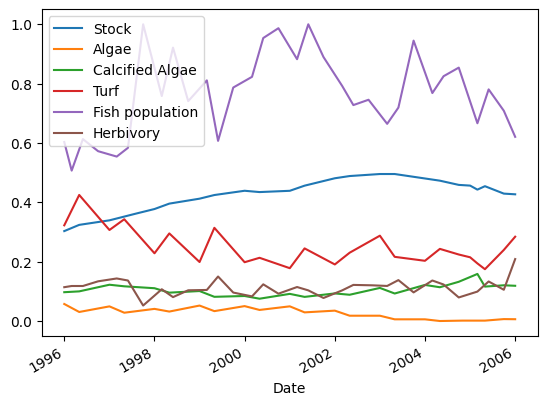

In [86]:
data_2['1996-01-01':'2006-01-01'].plot(y=['Stock', 'Algae', 'Calcified Algae', 'Turf', 'Fish population', 'Herbivory'])

In [87]:
data_model.loc['1991-01-01']

Stock                 0.342616
Fish population       0.499323
Recruitment rate           NaN
Algae                 0.150753
Calcified Algae       0.153249
Herbivory             0.221316
Habitat complexity         NaN
Turf                  0.274754
Space available       0.061904
Name: 1991-01-01 00:00:00, dtype: float64

In [88]:
data_ext = pd.read_csv('../fill_sst.csv')

In [89]:
data_ext.iloc[1461]

DateTime                1991-01-01
Temperature               28.21814
MMM                      28.681689
dhw                       0.001112
Acute thermal stress             0
excess                           0
nb_exces                        42
Name: 1461, dtype: object

In [90]:
data_ext = data_ext.set_index('DateTime')

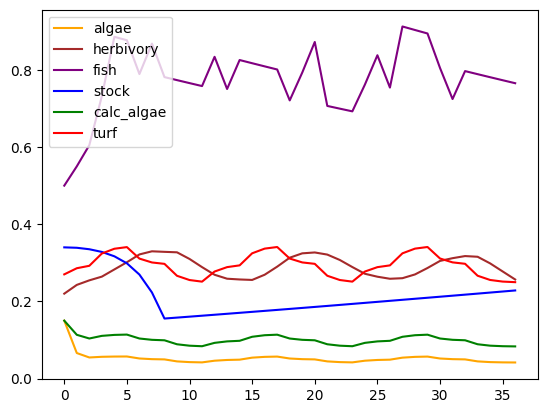

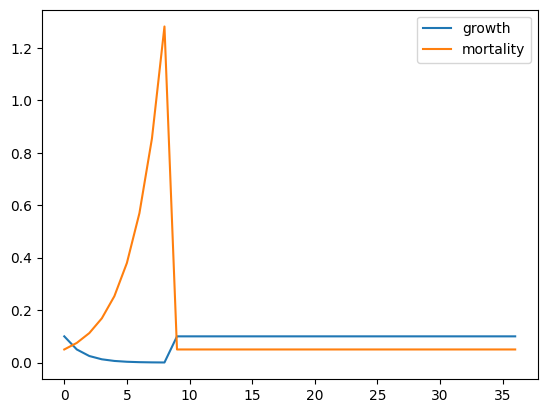

In [91]:
# function simulating a high dhw event and create a new environmental factors history
def high_dhw_event(dhw, time_under_stress, time_steps):
    environmental_factors_history = []
    for i in range(time_under_stress):
        environmental_factors_history.append({'COTS' : 0, 'temperature' : temperature(27.5, 1, 12, i), 'dhw' : dhw, 'storms' : 0, 'houle' : 0})
    for i in range(time_under_stress, time_steps):
        environmental_factors_history.append({'COTS' : 0, 'temperature' : temperature(27.5, 1, 12, i), 'dhw' : 0, 'storms' : 0, 'houle' : 0})
    model = BiologicalDynamicModel(bleaching_pressure=0, base_growth=0.1,  base_mortality = 0.05,
     sensi_growth_bleaching=0.50, sensi_mortality_bleaching=0.5, sensi_houle_alg = 1, sensi_coral_alg=0., sensi_herb_alg=0.1,
     nat_g_alg=2, nat_g_h=2, HA=0.1, sensi_cor_alg=0.05, coef_h=0.35, pisc=0.12)
    model.run_model(time_steps, environmental_factors_history)
    model.plot_results(turf=True, algae=True, stock=True, space_available=False, habitat_complexity=False, fish = True, herbivory=True, recruitment=True, mortality=False, growth=False)
    model.plot_results(turf=False, algae=False, stock=False, space_available=False, habitat_complexity=False, fish = False, herbivory=False, recruitment=False, mortality=True, growth=True, calc_algae=False)

    return model

# simulate a high dhw event
high_dhw_event(4, 8, 36) #.table_results()



(0.0, 1.0)

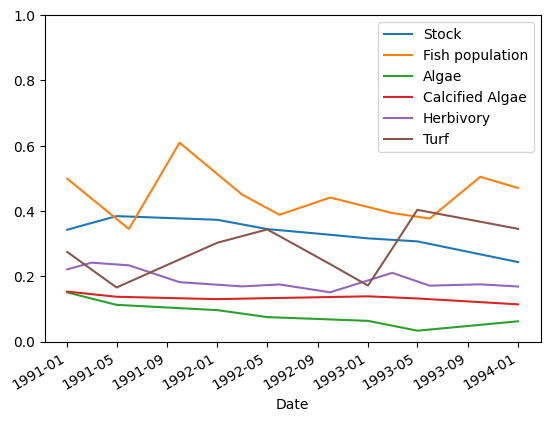

In [92]:
data_model['1991-01-01':'1994-01-01'].plot(y=['Stock', 'Fish population', 'Algae', 'Calcified Algae', 'Herbivory', 'Turf'])
plt.ylim(0, 1)

In [93]:
import numpy as np
from scipy.optimize import minimize

class ModelCalibrator:
    def __init__(self, model, data, environmental_factors_history):
        self.model = model
        self.data = data
        self.environmental_factors_history = environmental_factors_history
        self.time_steps = len(data) - 1
        # Utilisez des bornes pour les paramètres pour garantir qu'ils restent entre 0 et 1
        self.bounds = [(0, 100)] + [(0, 1)] * 28
    
    def objective_function(self, params):
        
        # reset model
        self.model = BiologicalDynamicModel()

        # Set model parameters
        self.set_model_parameters(params)
        
        # Run model with updated parameters
        self.model.run_model(self.time_steps, self.environmental_factors_history)
        
        # Calculate error between model output and observed data
        error = self.calculate_error()

        return error
    
    def set_model_parameters(self, params):
        # Update model parameters with calibrated values
        (len_history, threshold_dhw_low, threshold_dhw_high, bleaching_pressure, base_herbivory, base_complexity, base_space,
         base_stock, base_fish, base_growth, base_recruitment, base_mortality,
         sensi_growth_bleaching, sensi_space_rec, sensi_herbivory_rec, sensi_complexity_rec, sensi_stock_rec,
         threshold_complexity, threshold_space, threshold_herbivory, threshold_stock, sensi_mortality_bleaching,
         sensi_houle_alg, sensi_coral_alg, sensi_calc_alg, nat_g_alg, nat_g_h, HA, sensi_cor_alg) = params
        
        # Update model parameters
        self.model.threshold_dhw_low = threshold_dhw_low
        self.model.threshold_dhw_high = threshold_dhw_high
        self.model.bleaching_pressure = bleaching_pressure
        self.model.herbivory.base = base_herbivory
        self.model.habitat_complexity.base = base_complexity
        self.model.space_available.base = base_space
        self.model.stock.base = base_stock
        self.model.fish.base = base_fish
        self.model.growth.base = base_growth
        # self.model.recruitment.base = base_recruitment
        self.model.mortality.base = base_mortality
        self.model.growth.sensibility = sensi_growth_bleaching
        # self.model.recruitment.sensi_space = sensi_space_rec
        # self.model.recruitment.sensi_herbivory = sensi_herbivory_rec
        # self.model.recruitment.sensi_complexity = sensi_complexity_rec
        # self.model.recruitment.sensi_stock = sensi_stock_rec
        # self.model.recruitment.threshold_complexity = threshold_complexity
        # self.model.recruitment.threshold_space = threshold_space
        # self.model.recruitment.threshold_herbivory = threshold_herbivory
        # self.model.recruitment.threshold_stock = threshold_stock
        self.model.mortality.sensi_bleaching = sensi_mortality_bleaching
        self.model.algae.sensi_houle = sensi_houle_alg
        self.model.algae.sensi_coral = sensi_coral_alg
        self.model.algae.sensi_calc = sensi_calc_alg
    
    def calculate_error(self):
        # Calculate error between model output and observed data
        model_results = self.model.table_results()[['Stock', 'Fish population', 'Algae',
       'Calcified Algae', 'Herbivory', 'Habitat complexity', 'Turf',
       'Space available']].reindex(sorted(self.data.columns), axis=1)
        
        # Calculate error between model output and observed data, knowing that data and table_results are dataframes with the same columns
        error = np.linalg.norm(np.array(self.data.reindex(sorted(self.data.columns), axis=1)) - np.array(model_results))
        
        return error

    
    def calibrate_parameters(self, initial_guess):
        # Perform parameter calibration using optimization
        result = minimize(self.objective_function, initial_guess, method='Nelder-Mead', bounds=self.bounds, options={'disp': True})
        calibrated_params = result.x
        return calibrated_params

In [94]:
# Example usage:
# Instantiate your model and prepare your data
# initialize the model according to the first row of data_2
model = BiologicalDynamicModel(bleaching_pressure=0, base_growth=0.1,  base_mortality = 0.05,
     sensi_growth_bleaching=0.5, sensi_mortality_bleaching=1, sensi_houle_alg = 1, sensi_coral_alg=0., sensi_herb_alg=0.1,
     nat_g_alg=2, nat_g_h=2, HA=0.1, sensi_cor_alg=0.05, coef_h=0.35, pisc=0.12)


In [95]:
data = data_2  # Replace data_model with your actual data
data_2.sort_index(inplace=True)
data_2 = data_2['1996-01-01':'2005-12-31']


# moyenne par mois
data_2 = data_2.resample('M').mean()
data = data_2

In [96]:
# Instantiate the model calibrator
calibrator = ModelCalibrator(model, data, environmental_factors_history)

In [97]:
# Define initial guesses for model parameters based on
initial_guess = np.array([32, 1.5, 2, 0, 0.22, 0.5, 0.06, 0.34, 0.5, 0.1, 0.1, 0.05, 0.5, 1, 1, 1, 1, 0.9, 0.2, 0.1, 0.45, 1, 1, 1, 1, 1, 1, 1, 0.5])

In [98]:
len(initial_guess)

29

In [99]:
# hide RunTimeWarning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [100]:
# Calibrate the parameters
calibrated_params = calibrator.calibrate_parameters(initial_guess)

C:\Users\alexi\AppData\Local\Temp\ipykernel_26876\2036863716.py:77: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(self.objective_function, initial_guess, method='Nelder-Mead', bounds=self.bounds, options={'disp': True})


In [101]:
# Update model with calibrated parameters
calibrator.set_model_parameters(calibrated_params)

In [102]:
# Run the calibrated model
calibrator.model.run_model(len(data) - 1, environmental_factors_history)

In [103]:
calibrated_params

array([32.  ,  1.  ,  1.  ,  0.  ,  0.22,  0.5 ,  0.06,  0.34,  0.5 ,
        0.1 ,  0.1 ,  0.05,  0.5 ,  1.  ,  1.  ,  1.  ,  1.  ,  0.9 ,
        0.2 ,  0.1 ,  0.45,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  0.5 ])

In [104]:
model.table_results()

,growth,mortality,Algae,Herbivory,Fish population,Habitat complexity,Space available,Stock,Calcified Algae,Turf
0,0.1,0.05,0.15,0.22,0.5,0.5,0.06,0.34,0.15,0.27


In [105]:
np.linalg.norm(np.array(data.reindex(sorted(data.columns), axis=1)) - np.array(model.table_results()[['Stock', 'Fish population', 'Algae',
       'Calcified Algae', 'Herbivory', 'Habitat complexity', 'Turf',
       'Space available']]))

ValueError: operands could not be broadcast together with shapes (120,9) (1,8) 

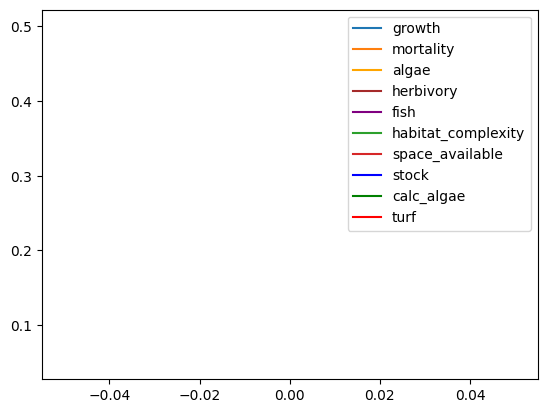

In [ ]:
model.plot_results()